# Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Impoer dataset

In [2]:
df = pd.read_csv('titanic_toy.csv')
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


# Check Null Percentage

In [3]:
df.isnull().mean()*100

,0
Age,19.865320
Fare,5.050505
Family,0.000000
Survived,0.000000


# Train test split

In [5]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
X_train.sample()

,Age,Fare,Family
632,32.0,30.5,0


In [8]:
X_test.isnull().sum()

,0
Age,37
Fare,9
Family,0


# fill value with mean and median with sklearn

In [9]:
imputer1 = SimpleImputer(strategy='mean')
imputer2 = SimpleImputer(strategy='median')

In [10]:
trf1 = ColumnTransformer([
    ('imputer1', imputer1, ['Age']),
    ('imputer2', imputer2, ['Fare'])
], remainder='passthrough')

In [14]:
trf1.fit_transform(X_train)
trf1.transform(X_test)

array([[ 29.49884615,  15.2458    ,   2.        ],
       [ 31.        ,  10.5       ,   0.        ],
       [ 20.        ,   7.925     ,   0.        ],
       [  6.        ,  33.        ,   1.        ],
       [ 14.        ,  11.2417    ,   1.        ],
       [ 26.        ,  78.85      ,   0.        ],
       [ 29.49884615,   7.75      ,   0.        ],
       [ 16.        ,  18.        ,   2.        ],
       [ 16.        ,   7.75      ,   0.        ],
       [ 19.        ,  26.2833    ,   2.        ],
       [ 37.        ,  53.1       ,   1.        ],
       [ 44.        ,   8.05      ,   0.        ],
       [ 29.49884615,  25.4667    ,   4.        ],
       [ 30.        ,   7.225     ,   0.        ],
       [ 36.        ,  13.        ,   0.        ],
       [ 16.        ,  39.4       ,   1.        ],
       [ 42.        ,  52.5542    ,   1.        ],
       [ 29.49884615,   7.8292    ,   0.        ],
       [ 27.        ,  13.        ,   0.        ],
       [ 47.        ,  52.     

# Construct new DataFrame

In [16]:
new_df = pd.DataFrame(trf1.fit_transform(X_train), columns=X_train.columns)
new_df.head()

,Age,Fare,Family
0,45.5,28.5000,0.0
1,23.0,13.0000,0.0
2,32.0,7.9250,0.0
3,26.0,7.8542,1.0
4,6.0,31.2750,6.0


# Distribution check

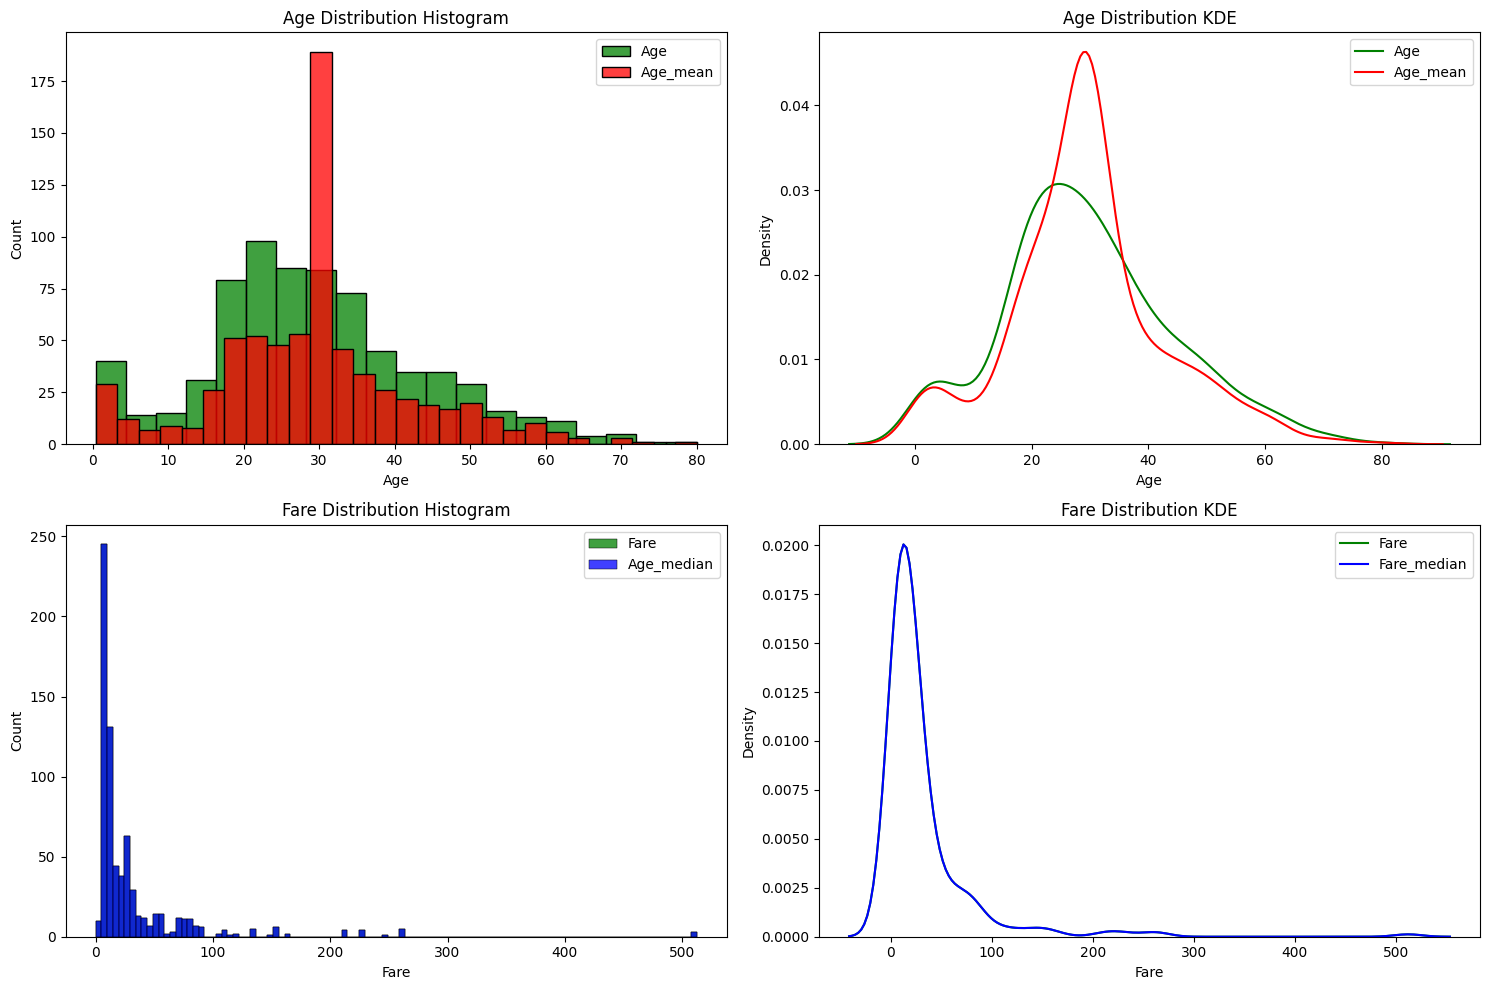

In [17]:
figure, axes = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(df['Age'], ax=axes[0, 0], color='green', label='Age')
sns.histplot(new_df['Age'], ax=axes[0, 0], color='red', label='Age_mean')
axes[0, 0].legend()
axes[0, 0].set_title('Age Distribution Histogram')

sns.kdeplot(df['Age'], ax=axes[0, 1], color='green', label='Age')
sns.kdeplot(new_df['Age'], ax=axes[0, 1], color='red', label='Age_mean')
axes[0, 1].legend()
axes[0, 1].set_title('Age Distribution KDE')

sns.histplot(new_df['Fare'], ax=axes[1, 0], color='green', label='Fare')
sns.histplot(new_df['Fare'], ax=axes[1, 0], color='blue', label='Age_median')
axes[1, 0].legend()
axes[1, 0].set_title('Fare Distribution Histogram')

sns.kdeplot(new_df['Fare'], ax=axes[1, 1], color='green', label='Fare')
sns.kdeplot(new_df['Fare'], ax=axes[1, 1], color='blue', label='Fare_median')
axes[1, 1].legend()
axes[1, 1].set_title('Fare Distribution KDE')
plt.tight_layout()
plt.show()